In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D

10000


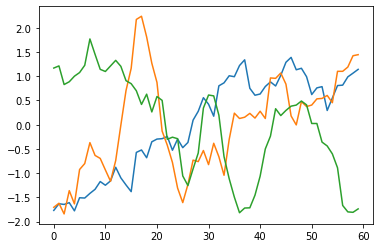

[1. 0. 0.]
10000 8000 2000 60


In [2]:
str0 = "ts_L60_Z12_A500_DX50_bias5_N10000"
fnamex = "DATA/x_" + str0 + ".csv"
fnamey = "DATA/y_" + str0 + ".csv"

x = np.loadtxt(fnamex, delimiter = ',', dtype = float)
N = len(x)
print(N)

xm = x.mean(axis=1)
for n in range(N):
    x[n] = x[n] - xm[n]
    
xstd = x.std(axis=1)
for n in range(N):
    x[n] = x[n] / xstd[n]

plt.plot(x[0])
plt.plot(x[1])
plt.plot(x[2])
plt.show()

categ = np.loadtxt(fnamey, delimiter = ',', dtype= int)
N_categ = 3
y = np.zeros((N, N_categ))
for n in range(N):
    y[n][categ[n]] = 1.

print(y[0])

perc_train = 0.8
N_train = int(N*perc_train)
N_val = N - N_train
x_train = x[:N_train]
y_train = y[:N_train]
x_val = x[N_train:]
y_val = y[N_train:]

L = len(x[0])
print(N, N_train, N_val, L)

### DATA RESHAPING

In [3]:
x_train = x_train.reshape(x_train.shape[0], L, 1)
x_val = x_val.reshape(x_val.shape[0], L, 1)
input_shape = (L, 1)

## Convolutional NN

In [4]:
from keras import initializers, regularizers
reg = regularizers.l1(0.1)
np.random.seed(12345)
ini = initializers.RandomNormal(mean=0, stddev = 0.05)

model = Sequential()
model.add(Conv1D(filters = 5, kernel_size = 11,
                 kernel_regularizer = reg,
                 kernel_initializer = ini,
                 activation = 'relu',
                 input_shape = input_shape 
                ))
model.add(AveragePooling1D(5))
model.add(Conv1D(filters = 5, kernel_size = 7, activation = 'relu'))
model.add(Flatten())
model.add(Dense(10, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(N_categ, activation = 'softmax'))

print(model.summary())

from keras import optimizers
opt = optimizers.SGD(lr = 0.01, momentum = 0.9, nesterov = True, decay = 1e-6)
model.compile(loss =keras.losses.categorical_crossentropy, 
             optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 50, 5)             60        
_________________________________________________________________
average_pooling1d (AveragePo (None, 10, 5)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4, 5)              180       
_________________________________________________________________
flatten (Flatten)            (None, 20)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [5]:
batch_size = 250
epochs = 250

fit = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), verbose = 2, shuffle=True)

Epoch 1/250
32/32 - 2s - loss: 1.2486 - accuracy: 0.3864 - val_loss: 1.1905 - val_accuracy: 0.3975
Epoch 2/250
32/32 - 0s - loss: 1.1541 - accuracy: 0.3812 - val_loss: 1.1249 - val_accuracy: 0.3920
Epoch 3/250
32/32 - 0s - loss: 1.1139 - accuracy: 0.3902 - val_loss: 1.1057 - val_accuracy: 0.3885
Epoch 4/250
32/32 - 0s - loss: 1.1023 - accuracy: 0.3781 - val_loss: 1.1001 - val_accuracy: 0.3535
Epoch 5/250
32/32 - 0s - loss: 1.1000 - accuracy: 0.3600 - val_loss: 1.0996 - val_accuracy: 0.3725
Epoch 6/250
32/32 - 0s - loss: 1.0997 - accuracy: 0.3607 - val_loss: 1.0994 - val_accuracy: 0.3725
Epoch 7/250
32/32 - 0s - loss: 1.0995 - accuracy: 0.3760 - val_loss: 1.0991 - val_accuracy: 0.4090
Epoch 8/250
32/32 - 0s - loss: 1.0993 - accuracy: 0.3779 - val_loss: 1.0989 - val_accuracy: 0.4115
Epoch 9/250
32/32 - 0s - loss: 1.0985 - accuracy: 0.3890 - val_loss: 1.0976 - val_accuracy: 0.4015
Epoch 10/250
32/32 - 0s - loss: 1.0969 - accuracy: 0.3845 - val_loss: 1.0951 - val_accuracy: 0.4295
Epoch 11/

32/32 - 0s - loss: 0.9012 - accuracy: 0.5638 - val_loss: 0.9083 - val_accuracy: 0.5585
Epoch 84/250
32/32 - 0s - loss: 0.8976 - accuracy: 0.5684 - val_loss: 0.9075 - val_accuracy: 0.5645
Epoch 85/250
32/32 - 0s - loss: 0.8970 - accuracy: 0.5642 - val_loss: 0.9091 - val_accuracy: 0.5635
Epoch 86/250
32/32 - 0s - loss: 0.8979 - accuracy: 0.5627 - val_loss: 0.9077 - val_accuracy: 0.5655
Epoch 87/250
32/32 - 0s - loss: 0.8946 - accuracy: 0.5601 - val_loss: 0.9084 - val_accuracy: 0.5695
Epoch 88/250
32/32 - 0s - loss: 0.8926 - accuracy: 0.5699 - val_loss: 0.9053 - val_accuracy: 0.5635
Epoch 89/250
32/32 - 0s - loss: 0.8978 - accuracy: 0.5684 - val_loss: 0.9046 - val_accuracy: 0.5720
Epoch 90/250
32/32 - 0s - loss: 0.8940 - accuracy: 0.5634 - val_loss: 0.9035 - val_accuracy: 0.5730
Epoch 91/250
32/32 - 0s - loss: 0.8928 - accuracy: 0.5696 - val_loss: 0.9021 - val_accuracy: 0.5655
Epoch 92/250
32/32 - 0s - loss: 0.8928 - accuracy: 0.5681 - val_loss: 0.9036 - val_accuracy: 0.5645
Epoch 93/250


Epoch 165/250
32/32 - 0s - loss: 0.8551 - accuracy: 0.5909 - val_loss: 0.8914 - val_accuracy: 0.5780
Epoch 166/250
32/32 - 0s - loss: 0.8603 - accuracy: 0.5915 - val_loss: 0.8675 - val_accuracy: 0.5905
Epoch 167/250
32/32 - 0s - loss: 0.8553 - accuracy: 0.5921 - val_loss: 0.8656 - val_accuracy: 0.5955
Epoch 168/250
32/32 - 0s - loss: 0.8596 - accuracy: 0.5867 - val_loss: 0.8645 - val_accuracy: 0.5945
Epoch 169/250
32/32 - 0s - loss: 0.8517 - accuracy: 0.5903 - val_loss: 0.8643 - val_accuracy: 0.5950
Epoch 170/250
32/32 - 0s - loss: 0.8510 - accuracy: 0.5950 - val_loss: 0.8652 - val_accuracy: 0.5940
Epoch 171/250
32/32 - 0s - loss: 0.8542 - accuracy: 0.5946 - val_loss: 0.8722 - val_accuracy: 0.5880
Epoch 172/250
32/32 - 0s - loss: 0.8584 - accuracy: 0.5900 - val_loss: 0.8701 - val_accuracy: 0.5815
Epoch 173/250
32/32 - 0s - loss: 0.8507 - accuracy: 0.5930 - val_loss: 0.8643 - val_accuracy: 0.5930
Epoch 174/250
32/32 - 0s - loss: 0.8517 - accuracy: 0.5930 - val_loss: 0.8739 - val_accurac

32/32 - 0s - loss: 0.8400 - accuracy: 0.5972 - val_loss: 0.8527 - val_accuracy: 0.6115
Epoch 247/250
32/32 - 0s - loss: 0.8380 - accuracy: 0.5969 - val_loss: 0.8520 - val_accuracy: 0.6115
Epoch 248/250
32/32 - 0s - loss: 0.8381 - accuracy: 0.5964 - val_loss: 0.8519 - val_accuracy: 0.5970
Epoch 249/250
32/32 - 0s - loss: 0.8387 - accuracy: 0.5960 - val_loss: 0.8521 - val_accuracy: 0.6070
Epoch 250/250
32/32 - 0s - loss: 0.8358 - accuracy: 0.6009 - val_loss: 0.8511 - val_accuracy: 0.6015


In [6]:
As = np.linspace(50,500,10)
for A in As:
    str0 = f"ts_L60_Z12_A{A}_DX50_bias5_N10000"
    fnamex = "DATA/x_" + str0 + ".csv"
    print(fnamex)
    fnamey = "DATA/y_" + str0 + ".csv"

DATA/x_ts_L60_Z12_A50.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A100.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A150.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A200.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A250.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A300.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A350.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A400.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A450.0_DX50_bias5_N10000.csv
DATA/x_ts_L60_Z12_A500.0_DX50_bias5_N10000.csv
